In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
final_opt = pd.read_csv("opt"+str(0+1)+".txt",sep='\t',names=['i', 'avg_time','avg_hash'])
final_naive = pd.read_csv("naive"+str(0+1)+".txt",sep='\t',names=['i', 'avg_time','avg_hash'])
final_opt['n'] = 2**final_opt['i']
final_naive['n'] = 2**final_naive['i']

In [3]:
final_naive['avg_hash'].mean()

3130.495785

In [4]:
max(final_naive['avg_hash'])

3298.8996

In [5]:
min(final_naive['avg_hash'])

1615.5089

In [6]:
final_opt['avg_hash'].mean()

5934.261115

In [7]:
max(final_opt['avg_hash'])

6260.7034

In [8]:
min(final_opt['avg_hash'])

3003.003

In [9]:
x = final_opt['avg_hash']/final_naive['avg_hash']

In [10]:
x.describe()

count    20.000000
mean      1.894475
std       0.010675
min       1.858859
25%       1.895190
50%       1.897758
75%       1.897816
max       1.915278
Name: avg_hash, dtype: float64

In [11]:
result = pd.merge(final_naive,final_opt,on=["n","i"])

In [12]:
print(result[['n','avg_hash_x','avg_hash_y']].to_latex(index=False))

\begin{tabular}{rrr}
\toprule
      n &  avg\_hash\_x &  avg\_hash\_y \\
\midrule
      2 &   1615.5089 &   3003.0030 \\
      4 &   2461.0336 &   4622.4961 \\
      8 &   2887.7888 &   5464.4809 \\
     16 &   3099.8140 &   5870.8415 \\
     32 &   3174.2781 &   6079.6235 \\
     64 &   3243.9112 &   6119.4755 \\
    128 &   3271.6781 &   6205.7271 \\
    256 &   3283.3323 &   6223.9145 \\
    512 &   3292.1864 &   6244.5009 \\
   1024 &   3294.9831 &   6255.1209 \\
   2048 &   3297.2148 &   6253.5132 \\
   4096 &   3297.9007 &   6259.0083 \\
   8192 &   3298.3937 &   6259.5621 \\
  16384 &   3298.7126 &   6260.1475 \\
  32768 &   3298.7734 &   6260.4605 \\
  65536 &   3298.8467 &   6260.6111 \\
 131072 &   3298.8771 &   6260.6526 \\
 262144 &   3298.8890 &   6260.6793 \\
 524288 &   3298.8936 &   6260.7004 \\
1048576 &   3298.8996 &   6260.7034 \\
\bottomrule
\end{tabular}



In [15]:
final_opt.to_pickle("psp.pkl")

In [13]:
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color=['tab:red', 'tab:green', 'b', 'y'])

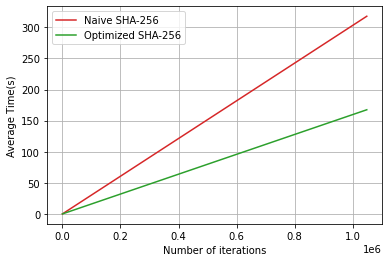

In [18]:
ax = final_naive.plot(x="n",y="avg_time")
final_opt.plot(x="n",y="avg_time",ax=ax)
ax.set(xlabel = "Number of iterations",ylabel = "Average Time(s)")
ax.legend(['Naive SHA-256','Optimized SHA-256'])
plt.grid()
plt.savefig("psp_t_vs_n.png",bbox_inches="tight",dpi=1000)

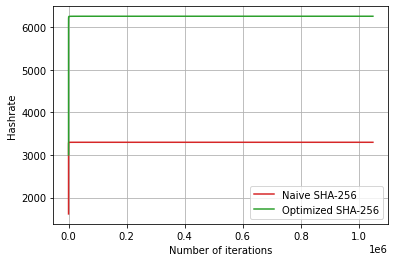

In [19]:
ax = final_naive.plot(x="n",y="avg_hash")
final_opt.plot(x="n",y="avg_hash",ax=ax)
ax.set(xlabel = "Number of iterations",ylabel = "Hashrate")
ax.legend(['Naive SHA-256','Optimized SHA-256'])
plt.grid()
plt.savefig("psp_h_vs_n.png",bbox_inches="tight",dpi=1000)

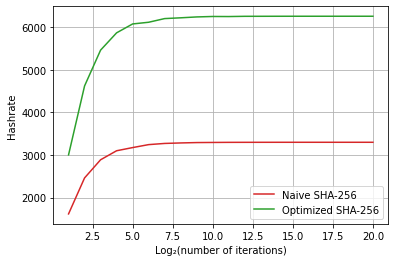

In [14]:
ax = final_naive.plot(x="i",y="avg_hash")
final_opt.plot(x="i",y="avg_hash",ax=ax)
ax.set(xlabel = "Log\N{SUBSCRIPT TWO}(number of iterations)",ylabel = "Hashrate")
ax.legend(['Naive SHA-256','Optimized SHA-256'])
plt.grid()
plt.savefig("psp_h_vs_i.pdf",bbox_inches="tight",dpi=1000)

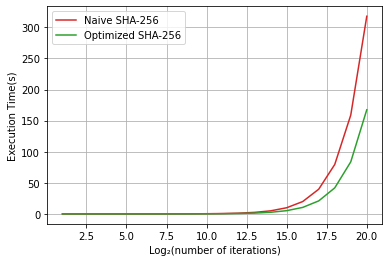

In [21]:
ax = final_naive.plot(x="i",y="avg_time")
final_opt.plot(x="i",y="avg_time",ax=ax)
ax.set(xlabel = "Log\N{SUBSCRIPT TWO}(number of iterations)",ylabel = "Execution Time(s)")
ax.legend(['Naive SHA-256','Optimized SHA-256'])
plt.grid()
plt.savefig("psp_t_vs_i.png",bbox_inches="tight",dpi=1000)